# Simulation Workflow PlayGround
This is the notebook for test and experiment functions behavior that belong the simulation workflow

## Creation of matrix of vectors using `np.stack`
Output we want to achieve
$\begin{bmatrix}
\begin{bmatrix}
x_0 \\
y_0
\end{bmatrix} & \dots & \\
\vdots & \ddots & \begin{bmatrix}
x_n \\
y_n
\end{bmatrix}
\end{bmatrix}$

In [4]:
import numpy as np

In [5]:
axis = np.linspace(0, 3, num=4) 
x, y = np.meshgrid(axis, axis)
x_vectors = np.stack((x, y), axis=2)
x_vectors

array([[[0., 0.],
        [1., 0.],
        [2., 0.],
        [3., 0.]],

       [[0., 1.],
        [1., 1.],
        [2., 1.],
        [3., 1.]],

       [[0., 2.],
        [1., 2.],
        [2., 2.],
        [3., 2.]],

       [[0., 3.],
        [1., 3.],
        [2., 3.],
        [3., 3.]]])

### Operations of matrix of vectors
One operations one would do is to compute the norm using `np.sqrt` and `**`

In [6]:
x_norm = np.sqrt(x_vectors[:,:,0]**2 + x_vectors[:,:,1]**2)
x_norm

array([[0.        , 1.        , 2.        , 3.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766],
       [2.        , 2.23606798, 2.82842712, 3.60555128],
       [3.        , 3.16227766, 3.60555128, 4.24264069]])

## Frequency modes in 2D
This part visualize and test the implementation of the discretization of the frequency domain.

In 1D a frequency modes be represented as
$\begin{equation}
\begin{bmatrix}
-k_n, & \dots & -k_{-1}, & 0, & k_1, & \dots & k_n\\
\end{bmatrix}
\end{equation}
$

In [25]:
import numpy as np
from scipy.fftpack import fftfreq, fftshift 
import matplotlib.pyplot as plt

In [26]:
k_axis = 2*np.pi*fftfreq(10, 2*np.pi/10)
k_axis

array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.])

In [27]:
shifted_k_axis = fftshift(k_axis)
shifted_k_axis

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

### Initialize 2D Frequency Domain

In [34]:
L = 2*np.pi
N = 256

In [35]:

k_axis = 2*np.pi*fftfreq(N, L/N)
dk = k_axis[2] - k_axis[1]
k_x, k_y = np.meshgrid(k_axis,k_axis)
k_vectors = np.stack((k_x, k_y), axis=2)
k = np.sqrt(k_x**2 + k_y**2)

Equal:  True


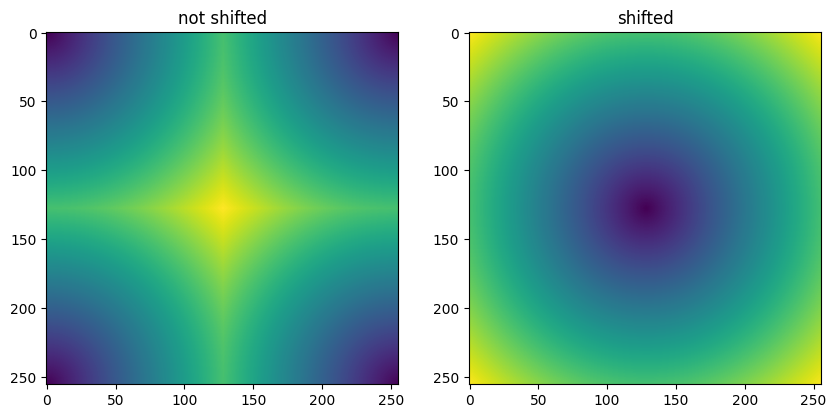

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

# not shifted
ax[0].imshow(k)
ax[0].set_title("not shifted")

# shifted
ax[1].imshow(fftshift(k))
ax[1].set_title("shifted")

print("Equal: ", np.array_equiv(k_vectors[:,:,1], k_y))

## Frequency Circle

Text(0.5, 1.0, 'shifted')

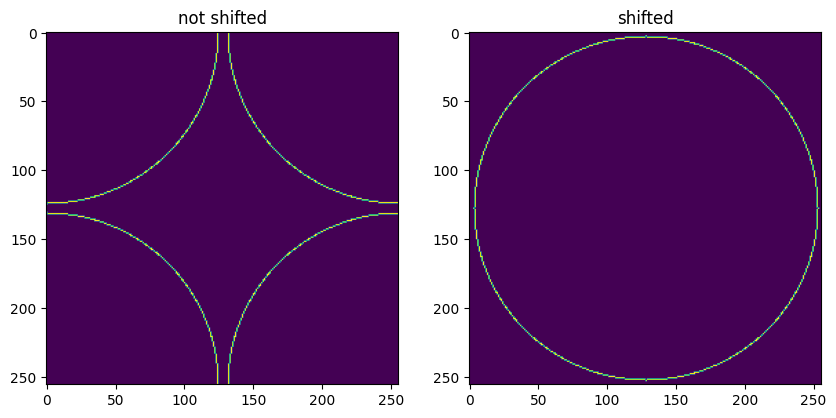

In [37]:
fig, ax = plt.subplots(1,2, figsize=(10,6))


# not shifted
circle = np.where((k > 124) & (k <= 125),1,0)
ax[0].imshow(circle)
ax[0].set_title("not shifted")

# not shifted
circle = np.where((fftshift(k) > 124) & (fftshift(k) <= 125),1,0)
ax[1].imshow(circle)
ax[1].set_title("shifted")

## De-Aliasing Technique
De-Aliasing is preformed according to the $2/3{\text{rds}}$ rule.
$\begin{equation}
    |k| < \frac{2}{3} K 
\end{equation}$
where $K$ is equal to half number of grid points in one space dimension
$\begin{equation}
    K = \frac{N}{2}
\end{equation}$

Comparing two computations
$\begin{equation}
    |k| < \frac{2}{3} K \qquad \textbf{vs} \qquad |k|^2 < \frac{2}{3} K^2
\end{equation}$
 


Equal:  True


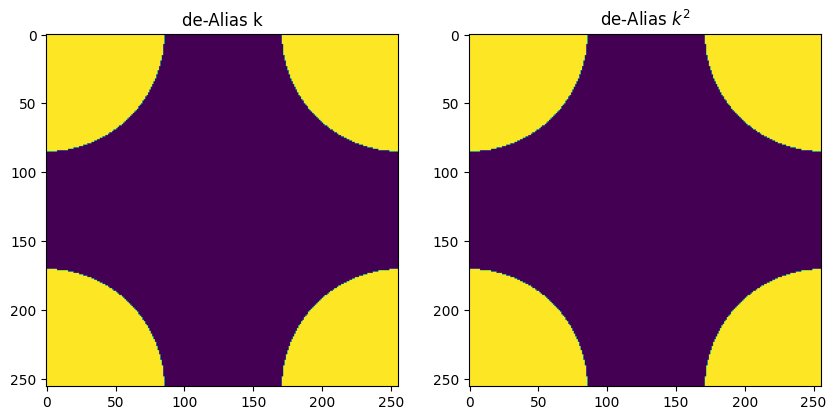

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

# de-alias k
de_alias_k = np.where(k < (2/3*(N/2)*dk), 1, 0)

ax[0].imshow(de_alias_k)
ax[0].set_title("de-Alias k")

# de-alias k^2
de_alias_k2 = np.where(k**2 < (2/3*(N/2)*dk)**2, 1, 0)

ax[1].imshow(de_alias_k2)
ax[1].set_title("de-Alias $k^2$")

print("Equal: ", np.array_equiv(de_alias_k, de_alias_k2))

Equal:  True


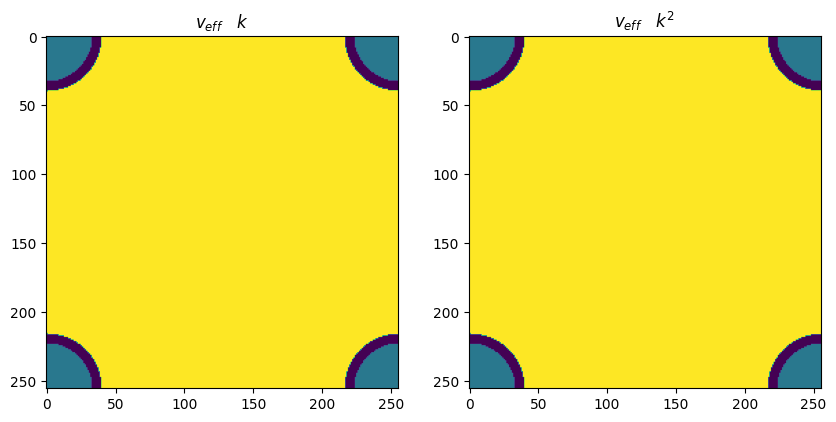

In [39]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

# v_eff k
v_eff_k = np.zeros_like(k)
v_eff_k[k < 33] = 1.1e-3
v_eff_k[(k >= 33) & (k <= 40)] = -5*1.1e-3
v_eff_k[k > 40] = 10*1.1e-3

ax[0].imshow(v_eff_k)
ax[0].set_title("$v_{eff} \quad k$")


# v_eff k^2
v_eff_k2 = np.zeros_like(k)
v_eff_k2[k**2 < 33**2] = 1.1e-3
v_eff_k2[(k**2 >= 33**2) & (k**2 <= 40**2)] = -5*1.1e-3
v_eff_k2[k**2 > 40**2] = 10*1.1e-3

ax[1].imshow(v_eff_k2)
ax[1].set_title("$v_{eff} \quad k^2$")

print("Equal: ", np.array_equiv(v_eff_k, v_eff_k2))